In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mostafaabla/garbage-classification

 92% 221M/239M [00:02<00:00, 141MB/s]
100% 239M/239M [00:02<00:00, 120MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/garbage-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#Using Generators
gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/garbage_classification",
                                           target_size = (256, 256), batch_size = 32, class_mode="categorical")

Found 15515 images belonging to 12 classes.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base = VGG16(weights = 'imagenet',include_top = False,input_shape = (256,256,3))

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(12,activation='softmax'))

In [8]:
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 12)                393228    
                                                                 
Total params: 15,107,916
Trainable params: 393,228
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

In [10]:
res = model.fit(train_data,epochs = 20,steps_per_epoch=len(train_data))

Epoch 1/20
485/485 [==============================] - 291s 569ms/step - loss: 1.3226 - accuracy: 0.6191
Epoch 2/20
485/485 [==============================] - 275s 568ms/step - loss: 1.0049 - accuracy: 0.6987
Epoch 3/20
485/485 [==============================] - 271s 559ms/step - loss: 0.8946 - accuracy: 0.7337
Epoch 4/20
485/485 [==============================] - 271s 558ms/step - loss: 0.8334 - accuracy: 0.7496
Epoch 5/20
485/485 [==============================] - 275s 567ms/step - loss: 0.7984 - accuracy: 0.7589
Epoch 6/20
485/485 [==============================] - 273s 562ms/step - loss: 0.7672 - accuracy: 0.7682
Epoch 7/20
485/485 [==============================] - 270s 557ms/step - loss: 0.7459 - accuracy: 0.7763
Epoch 8/20
485/485 [==============================] - 275s 567ms/step - loss: 0.6992 - accuracy: 0.7898
Epoch 9/20
485/485 [==============================] - 278s 574ms/step - loss: 0.6964 - accuracy: 0.7916
Epoch 10/20
485/485 [==============================] - 273s 563m

In [11]:
from keras.models import load_model
model.save("network1.h5")

In [12]:
loaded_model = load_model("network1.h5")

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from tensorflow.keras.preprocessing import image
output_class = ["battery", "biological", "brown-glass", "cardboard", "clothes", "green-glass", "metal", "paper", "plastic","shoes","trash","white-glass"]
def waste_prediction(new_image):
  t_img = image.load_img(new_image, target_size = (256,256))
  plt.axis("off")
  plt.imshow(t_img)
  plt.show()

  t_img = image.img_to_array(t_img)/255
  t_img = np.expand_dims(t_img, axis=0)

  predicted_array = model.predict(t_img)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

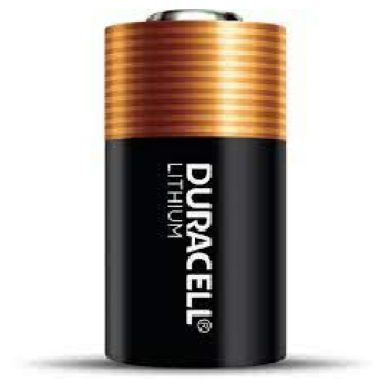

1/1 [==============================] - 1s 774ms/step
Your waste material is  battery  with  100.0  % accuracy


In [16]:
waste_prediction("/content/battery.jpeg")

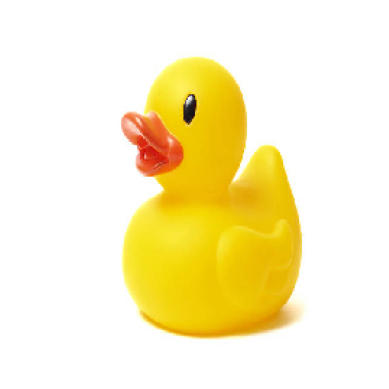

1/1 [==============================] - 0s 25ms/step
Your waste material is  shoes  with  99.38  % accuracy


In [17]:
waste_prediction("/content/ducky.jpg")